In [1]:
# Dependencies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import requests
from census import Census
from us import states
from pprint import pprint

# Census API Key
import sys
sys.path.append('../../../..')
from config import census_api_key
c = Census(census_api_key, year=2016)

In [2]:
census_data = c.acs5.get(("NAME", "B01003_001E", "B01001_002E", "B01001_026E", "B02001_002E", "B02001_003E","B02001_004E", "B02001_005E",
                          "B02001_006E", "B02001_007E", "B02001_008E", "B03002_012E", "B08013_001E", "B08012_001E", "B15003_001E",
                          "B15003_002E", "B15003_003E", "B15003_004E", "B15003_005E", "B15003_006E", "B15003_007E", "B15003_008E",
                          "B15003_009E", "B15003_010E", "B15003_011E", "B15003_012E", "B15003_013E", "B15003_014E", "B15003_015E",
                          "B15003_016E", "B15003_017E", "B15003_018E", "B15003_019E", "B15003_020E", "B15003_021E", "B15003_022E",
                          "B15003_023E", "B15003_024E", "B15003_025E", "B17001_001E", "B17001_002E", "B18135_001E", "B18135_003E", 
                          "B18135_014E", "B18135_025E", "B19001_001E", "B19013_001E", "B19055_002E", "B19056_002E", "B19057_002E",
                          "B19001_002E", "B19001_003E", "B19001_004E", "B19001_005E", "B19001_006E", "B19001_007E", "B19001_008E",
                          "B19001_009E", "B19001_010E", "B19001_011E", "B19001_012E", "B19001_013E", "B19001_014E", "B19001_015E",
                          "B19001_016E", "B19001_017E", "B23025_003E", "B23025_005E", "B25002_001E", "B25002_002E", "B25004_001E",
                          "B25043_007E", "B25043_016E", "B27010_017E", "B27010_033E", "B27010_050E", "B27010_066E"),
                         {'for': 'zip code tabulation area:*'})

census_pd = pd.DataFrame(census_data)

#Column Renaming
census_pd = census_pd.rename(columns={"B01003_001E": "Population",
                                      "B01001_002E": "Male",
                                      "B01001_026E": "Female",
                                      "B02001_002E": "White",
                                      "B02001_003E": "Black",
                                      "B02001_004E": "Indian", 
                                      "B02001_005E": "Asian",
                                      "B02001_006E": "Hawaiian",
                                      "B02001_007E": "Other Race",
                                      "B02001_008E": "Multirace",
                                      "B03002_012E": "Hispanic Origin",
                                      "B08013_001E": "Length of Commute", 
                                      "B08012_001E": "Workers over 16", 
                                      "B15003_001E": "Age Over 25",
                                      "B15003_002E": "No schooling",
                                      "B15003_003E": "Nursery school",
                                      "B15003_004E": "Kindergarten",
                                      "B15003_005E": "1st grade",
                                      "B15003_006E": "2nd grade",
                                      "B15003_007E": "3rd grade",
                                      "B15003_008E": "4th grade",
                                      "B15003_009E": "5th grade",
                                      "B15003_010E": "6th grade",
                                      "B15003_011E": "7th grade",
                                      "B15003_012E": "8th grade",
                                      "B15003_013E": "9th grade",
                                      "B15003_014E": "10th grade",
                                      "B15003_015E": "11th grade",
                                      "B15003_016E": "12th grade no diploma",
                                      "B15003_017E": "High school diploma",
                                      "B15003_018E": "GED or alter",
                                      "B15003_019E": "College less than 1 year",
                                      "B15003_020E": "Some college 1 or more years",
                                      "B15003_021E": "Associate's degree",
                                      "B15003_022E": "Bachelor's degree",
                                      "B15003_023E": "Master's degree",
                                      "B15003_024E": "Professional school",
                                      "B15003_025E": "Doctorate degree",
                                      "B17001_001E": "Poverty Universe",
                                      "B17001_002E": "Poverty Count",
                                      "B18135_001E": "Non-Instiutionalized",
                                      "B18135_003E": "Disability 1",                           
                                      "B18135_014E": "Disability 2", 
                                      "B18135_025E": "Disability 3",
                                      "B19001_001E": "Households",
                                      "B19013_001E": "Per capita",
                                      "B19057_002E": "Cash Public Assistance",
                                      "B19001_002E": "Less than $10k",
                                      "B19001_003E": "$10k", 
                                      "B19001_004E": "$15k",
                                      "B19001_005E": "$20k",
                                      "B19001_006E": "$25k",
                                      "B19001_007E": "$30k",
                                      "B19001_008E": "$35k",
                                      "B19001_009E": "$40k",
                                      "B19001_010E": "$45k",
                                      "B19001_011E": "$50k",
                                      "B19001_012E": "$60k",
                                      "B19001_013E": "$75k",
                                      "B19001_014E": "$100k",
                                      "B19001_015E": "$125k",
                                      "B19001_016E": "$150k",
                                      "B19001_017E": "$200k or more",
                                      "B23025_003E": "Civilian Labor Force", 
                                      "B23025_005E": "Unemployed Civilian",
                                      "B25002_001E": "Housing Units", 
                                      "B25002_002E": "Occupied Housing",
                                      "B25004_001E": "Vacant Housing",
                                      "B25043_007E": "No phone 1", 
                                      "B25043_016E": "No phone 2",
                                      "B27010_017E": "No HI1",
                                      "B27010_033E": "No HI2",
                                      "B27010_050E": "No HI3",
                                      "B27010_066E": "No HI4",
                                      "NAME": "Name", "zip code tabulation area": "Zipcode"})

##################################################
# percentage of white people
census_pd["white rate"] = 100 * census_pd["White"]/census_pd["Population"]

# percentage of black people
census_pd["black rate"] = 100 * census_pd["Black"]/census_pd["Population"]

# percentage of indian people
census_pd["indian rate"] = 100 * census_pd["Indian"]/census_pd["Population"]

# percentage of asian people
census_pd["asian rate"] = 100 * census_pd["Asian"]/census_pd["Population"]

# percentage of hawaiian people
census_pd["hawaiian rate"] = 100 * census_pd["Hawaiian"]/census_pd["Population"]

# percentage of other race
census_pd["other race rate"] = 100 * census_pd["Other Race"]/census_pd["Population"]

# percentage of multirace
census_pd["multirace rate"] = 100 * census_pd["Multirace"]/census_pd["Population"]

# percentage of hispanic
census_pd["hispanic rate"] = 100 * census_pd["Hispanic Origin"]/census_pd["Population"]

########################################################
# percentage of age over 25 with no schooling
census_pd["No schooling rate"] = 100 * census_pd["No schooling"]/census_pd["Age Over 25"]

# percentage of nursey school to 8th grade
census_pd["Nurse to 8th"] = census_pd["Kindergarten"] + census_pd["1st grade"] + census_pd["2nd grade"]\
    + census_pd["3rd grade"] + census_pd["4th grade"] + census_pd["5th grade"] + census_pd["6th grade"]\
    + census_pd["7th grade"] + census_pd["8th grade"]
census_pd["Nurse to 8th Grade Rate"] = 100 * census_pd["Nurse to 8th"]/census_pd["Age Over 25"]

# percentage of some high school
census_pd["some high school"] = census_pd["9th grade"] + census_pd["10th grade"] + census_pd["11th grade"]\
    + census_pd["12th grade no diploma"]
census_pd["some high school rate"] = 100 * census_pd["some high school"]/census_pd["Age Over 25"]

# percentage of high school graduates or equilvalent
census_pd["high school grad"] = census_pd["High school diploma"] + census_pd["GED or alter"] 
census_pd["high school grad rate"] = 100 * census_pd["high school grad"]/census_pd["Age Over 25"]

# percentage of some college
census_pd["some college"] = census_pd["College less than 1 year"] + census_pd["Some college 1 or more years"] 
census_pd["some college rate"] = 100 * census_pd["some college"]/census_pd["Age Over 25"]

# percentage of associate degree
census_pd["Associate's degree rate"] = 100 * census_pd["Associate's degree"]/census_pd["Age Over 25"]

# percentage of bachelor degree
census_pd["Bachelor's degree rate"] = 100 * census_pd["Bachelor's degree"]/census_pd["Age Over 25"]

# percentage of graduate degree
census_pd["graduate degree"] = census_pd["Master's degree"] + census_pd["Professional school"] + census_pd["Doctorate degree"]
census_pd["graduate degree rate"] = 100 * census_pd["graduate degree"]/census_pd["Age Over 25"]

# high school grad or higher
census_pd["high school grad and up"] = census_pd["high school grad"] + census_pd["some college"]\
    + census_pd["Associate\'s degree"] + census_pd["Bachelor\'s degree"] + census_pd["graduate degree"]
census_pd["high school grad and up rate"] = 100 * census_pd["high school grad and up"]/census_pd["Age Over 25"]

# bachelor degree or higher
census_pd["bachelor or higher"] = census_pd["Bachelor\'s degree"] + census_pd["graduate degree"]
census_pd["bachelor or higher rate"] = 100 * census_pd["bachelor or higher"]/census_pd["Age Over 25"]

######################################################
# Add in Poverty Rate (Poverty Count / Poverty Universe) 
census_pd["Poverty Rate"] = 100 * \
    census_pd["Poverty Count"].astype(
         int) / census_pd["Poverty Universe"].astype(int)

#####################################################
# percentage of less than 10k
census_pd["Less than 10k rate"] = 100 * census_pd["Less than $10k"]/census_pd["Households"]

# percentage of 10k-25k
census_pd["10k to 25k"] = census_pd["$10k"] + census_pd["$15k"] + census_pd["$20k"]
census_pd["10k to 25k rate"] = 100 * census_pd["10k to 25k"]/census_pd["Households"]

# percentage of 25k-50k
census_pd["25k to 50k"] = census_pd["$25k"] + census_pd["$30k"] + census_pd["$35k"] + census_pd["$40k"] + census_pd["$45k"]
census_pd["25k to 50k rate"] = 100 * census_pd["25k to 50k"]/census_pd["Households"]

# percentage of 50k-75k
census_pd["50k to 75k"] = census_pd["$50k"] + census_pd["$60k"]  
census_pd["50k to 75k rate"] = 100 * census_pd["50k to 75k"]/census_pd["Households"]

# percentage of 75k-100k
census_pd["75k to 100k rate"] = 100 * census_pd["$75k"]/census_pd["Households"]

# percentage of 100k-150k
census_pd["100k to 150k"] = census_pd["$100k"] + census_pd["$125k"]  
census_pd["100k to 150k rate"] = 100 * census_pd["100k to 150k"]/census_pd["Households"]

# percentage of 75k-100k
census_pd["150k to 200k rate"] = 100 * census_pd["$150k"]/census_pd["Households"]

# percentage of over 200k
census_pd["over 200k rate"] = 100 * census_pd["$200k or more"]/census_pd["Households"]

######################################################
# Average Commuting (Length of Commute / Workers Over 16) 
census_pd["Average Commute"] = census_pd["Length of Commute"]/census_pd["Workers over 16"]

##########################################################
# Percentage of disabled population 
census_pd["Disability"] = census_pd["Disability 1"] + census_pd["Disability 2"] + census_pd["Disability 3"]
census_pd["Disability Rate"] = 100 * census_pd["Disability"] / census_pd["Non-Instiutionalized"]

########################################################
# Add in Unemployment Rate
census_pd["Unemployment Rate"] = 100 * \
    census_pd["Unemployed Civilian"].astype(
        int) / census_pd["Civilian Labor Force"].astype(int)

#########################################################
# Add in Vacancy Rate
census_pd["Vacancy Rate"] = 100 * \
    census_pd["Vacant Housing"].astype(
        int) / census_pd["Housing Units"].astype(int)

###########################################################
# Add Health Insurance Rate
census_pd["No Health Insurance"] = census_pd["No HI1"] + census_pd["No HI2"] + census_pd["No HI3"] + census_pd["No HI4"]
census_pd["No Health Insurance Rate"] = 100 * census_pd["No Health Insurance"] / census_pd["Non-Instiutionalized"]

############################################################
# public assistance rate
census_pd["Cash Public Assistance Rate"] = 100 * (census_pd["Cash Public Assistance"]) / census_pd["Households"]


In [3]:
# check number of columns 124
len(census_pd.columns)


124

In [4]:
# open csv of zipcode with lat and long in string
latlng_df = pd.read_csv("zip code with lat and long.csv", dtype='str')

# open csv of rural percentage with zipcode in string
rural_df = pd.read_csv("RuralPercent.csv", dtype='str')


In [5]:
# merge census pd and latlng df by Zipcode
census_pd = pd.merge(census_pd, latlng_df, on="Zipcode")

# check length 126
len(census_pd.columns)

126

In [6]:
# merge census pd (already with latlng) with rural percentage by zipcode
census_pd = pd.merge(census_pd, rural_df, on="Zipcode")

# check length 128
len(census_pd.columns)

128

In [12]:
# set conditions for new column of Urban and Rural based off the percentage of rural percent (used later for t tests)
conditions = [census_pd["Rural Percent"].astype(float) <= 50,
              census_pd["Rural Percent"].astype(float) > 50]

# set outputs for new column
outputs = ["Urban", "Rural"]

# create series based off of conditions and outputs
res = np.select(conditions, outputs, 'fill')

# add series to the dataframe
census_pd["label"] = pd.Series(res)

#check to see rural and urban value count 
census_pd["label"].value_counts()

Rural    19556
Urban    13563
Name: label, dtype: int64

In [13]:
# export the large dataframe based off census API to csv
census_pd.to_csv('censusall.csv')

In [14]:
# read in the large dataframe csv
census_pd = pd.read_csv('censusall.csv')

# remove from dataframe all rows that do not have any population in census data
census_pd = census_pd[census_pd["Population"] != 0]

# check length
len(census_pd)

32798

In [15]:
####BUILD THOSE DATAFRAMES####

# Race Dataframe
census_pd_race = census_pd[["Zipcode", "LAT", "LNG", "Rural Percent", "Urban Percent", "Population", "white rate",
                            "black rate", "indian rate", "asian rate", "hawaiian rate", "other race rate", "multirace rate",
                            "hispanic rate", "label"]]

# Education DataFrame
census_pd_educ = census_pd[["Zipcode", "LAT", "LNG", "Rural Percent", "Urban Percent", "Age Over 25", "No schooling rate",
                            "Nurse to 8th Grade Rate", "some high school rate", "high school grad rate", "some college rate",
                            "Associate's degree rate", "Bachelor's degree rate", "graduate degree rate",
                           "high school grad and up rate", "bachelor or higher rate", "label"]]

# remove from dataframe all rows that do not have anyone over age of 25 in census data
census_pd_educ = census_pd_educ[census_pd_educ["Age Over 25"] != 0]

# Income DataFrame (includes cash assistance)
census_pd_income = census_pd[["Zipcode", "LAT", "LNG", "Rural Percent", "Urban Percent", "Households", "Per capita", 
                              "Less than 10k rate", "10k to 25k rate", "25k to 50k rate", "50k to 75k rate", 
                              "75k to 100k rate", "100k to 150k rate", "150k to 200k rate", "over 200k rate",
                              "Cash Public Assistance Rate", "label"]]

# remove from dataframe all rows that do not have any households in census data
census_pd_income = census_pd_income[census_pd_income["Households"] != 0]

# Poverty DataFrame
census_pd_poverty = census_pd[["Zipcode", "LAT", "LNG", "Rural Percent", "Urban Percent", "Poverty Rate",
                               "Poverty Universe", "label"]]

# remove from dataframe all rows that do not have any poverty universe in census data
census_pd_poverty = census_pd_poverty[census_pd_poverty["Poverty Universe"] != 0]

# Commute DataFrame
census_pd_commute = census_pd[["Zipcode", "LAT", "LNG", "Rural Percent", "Urban Percent", "Average Commute",
                               "Workers over 16", "label"]]

# remove from dataframe all rows that do not have any workers over 16 in census data
census_pd_commute = census_pd_commute[census_pd_commute["Workers over 16"] != 0]

# Disability and Health Insurance DataFrame
census_pd_disable = census_pd[["Zipcode", "LAT", "LNG", "Rural Percent", "Urban Percent", "Disability Rate",
                               "No Health Insurance Rate", "Non-Instiutionalized", "label"]]

# remove from dataframe all rows that do not have any non-institutionalized in the census data
census_pd_disable = census_pd_disable[census_pd_disable["Non-Instiutionalized"] != 0]

# unemployment dataframe
census_pd_unemploy = census_pd[["Zipcode", "LAT", "LNG", "Rural Percent", "Urban Percent", "Unemployment Rate", 
                                "Civilian Labor Force", "label"]]

# remove from dataframe all rows that do not have any civilian labor force in the census data
census_pd_unemploy = census_pd_unemploy[census_pd_unemploy["Civilian Labor Force"] != 0]

# vacancy dataframe
census_pd_vacant = census_pd[["Zipcode", "LAT", "LNG", "Rural Percent", "Urban Percent", "Vacancy Rate",
                              "Housing Units", "label"]]

# remove from dataframe all rows that do not have any housing units in the census data
census_pd_vacant = census_pd_vacant[census_pd_vacant["Housing Units"] != 0]


In [32]:
# create variables holding all urban data and rural data separately for t analysis
urban = census_pd_income.groupby(["label"]).get_group("Urban")
rural = census_pd_income.groupby(["label"]).get_group("Rural")


from scipy.stats import sem, ttest_ind


(t_stat, p) = ttest_ind(urban["Less than 10k rate"], rural["Less than 10k rate"], equal_var=False)
print(t_stat)
print(p)

if p < 0.05:
    print("The differences between the urban and rural are significant.")
else:
    print("The differences between urban and rural are due to chance.")


-0.909163687282189
0.36327082327538596
The differences between urban and rural are due to chance.


In [21]:
census_pd_income.head(10)

Zipcode        LAT        LNG  Rural Percent  Urban Percent  Households  \
0     1001  42.062368 -72.625754           0.51          99.49      7190.0   
1     1002  42.364061 -72.458739          12.01          87.99      9561.0   
2     1003  42.389941 -72.524108           0.00         100.00        26.0   
3     1005  42.418848 -72.106598         100.00           0.00      1840.0   
4     1007  42.279010 -72.400468          59.62          40.38      5611.0   
5     1008  42.190144 -72.954350         100.00           0.00       530.0   
6     1009  42.211969 -72.341433          14.98          85.02       106.0   
7     1010  42.128176 -72.205352         100.00           0.00      1494.0   
8     1011  42.300281 -72.968716         100.00           0.00       552.0   
9     1012  42.375425 -72.858192         100.00           0.00       243.0   

    Per capita  Less than 10k rate  10k to 25k rate  25k to 50k rate  \
0      56714.0            6.008345        16.369958        20.097357   
1      48923.0           12.979814        16.190775        21.608618   
2       2499.0           57.692308        26.923077         0.000000   
3      70568.0            3.858696         9.239130        21.413043   
4      80502.0            5.097131         8.928890        18.481554   
5      67250.0            0.566038         6.792453        23.018868   
6 -666666666.0            0.000000        42.452830         6.603774   
7      83273.0            3.815261        12.717537        17.670683   
8      74722.0            4.347826         7.971014        18.840580   
9      60417.0            6.995885        13.168724        23.045267   

   50k to 75k rate  75k to 100k rate  100k to 150k rate  150k to 200k rate  \
0        18.358832         13.824757          17.663421           5.646732   
1        11.484154         10.804309          12.550988           6.829830   
2        15.384615          0.000000           0.000000           0.000000   
3        18.260870         14.619565          16.847826          10.923913   
4        14.311174         15.220103          23.952950           7.770451   
5        29.811321         12.641509          20.000000           2.641509   
6        16.037736         18.867925          16.037736           0.000000   
7        13.453815         15.194110          15.662651          14.257028   
8        19.021739         24.818841          17.572464           5.797101   
9        21.810700         13.991770           6.995885           8.230453   

   over 200k rate  Cash Public Assistance Rate  label  
0        2.030598                     2.962448  Urban  
1        7.551511                     2.248719  Urban  
2        0.000000                     0.000000  Urban  
3        4.836957                     2.500000  Rural  
4        6.237747                     1.924791  Rural  
5        4.528302                     0.566038  Rural  
6        0.000000                     0.000000  Urban  
7        7.228916                     1.807229  Rural  
8        1.630435                     3.442029  Rural  
9        5.761317                     0.000000  Rural

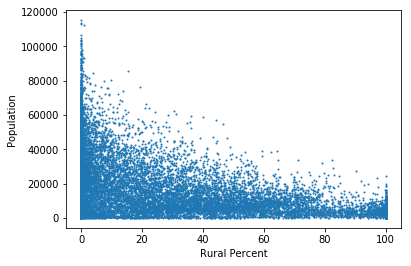

In [17]:
plt.scatter(census_pd_race["Rural Percent"], census_pd["Population"], marker='o', s=1)
plt.xlabel("Rural Percent")
plt.ylabel("Population")
plt.show()

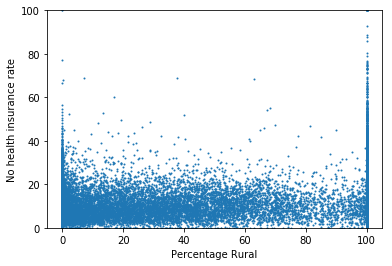

In [37]:
# census_pd_income_samp = census_pd_educ.sample(100, replace=True)

plt.scatter(census_pd_disable["Rural Percent"], census_pd_disable["No Health Insurance Rate"], marker='o', s=1)
plt.xlabel("Percentage Rural")
plt.ylabel("No health insurance rate")
plt.ylim(0,100)

plt.show()


In [ ]:
################################## TEST CODE ##################
#############################################################

In [ ]:
#########TEST CODE#############################
# COMMENT OUT BEFORE RUNNING ALL

census_pd_educ = census_pd[["Zipcode", "LAT", "LNG", "Rural Percent", "Urban Percent", "Age Over 25", "No schooling rate",
                            "Nurse to 8th Grade Rate", "some high school rate", "high school grad rate", "some college rate",
                            "Associate's degree rate", "Bachelor's degree rate", "graduate degree rate",
                           "high school grad and up rate", "bachelor or higher rate"]]
census_pd_educ = census_pd_educ[census_pd_educ["Age Over 25"] != 0]

conditions = [census_pd_educ["Rural Percent"] <= 20,
              census_pd_educ["Rural Percent"] <= 40,
              census_pd_educ["Rural Percent"] <= 60,
              census_pd_educ["Rural Percent"] <= 80,
              census_pd_educ["Rural Percent"] > 80]

outputs = ["Super Urban", "Pretty Urban", "Middle", "Pretty Rural", "Super Rural"]

res = np.select(conditions, outputs, 'fill')
census_pd_educ["label"] = pd.Series(res)

census_pd_educ.head()

# Commute DataFrame
census_pd_commute = census_pd[["Zipcode", "LAT", "LNG", "Rural Percent", "Urban Percent", "Average Commute", "Workers over 16"]]
census_pd_commute = census_pd_commute[census_pd_commute["Workers over 16"] != 0]
census_pd_commute.head()

conditions = [census_pd_commute["Rural Percent"] <= 50,
              census_pd_commute["Rural Percent"] > 50]

outputs = ["Urban", "Rural"]

res = np.select(conditions, outputs, 'fill')
census_pd_commute["label"] = pd.Series(res)

census_pd_commute["label"].value_counts()

In [ ]:
from scipy.stats import sem, ttest_ind

(t_stat, p) = ttest_ind(census_pd_misc["Rural Percent"], census_pd_misc["No Health Insurance Rate"], equal_var=False)print(t_stat)
print(p)

if p < 0.05:
    print("The differences between the high and low prices are significant.")
else:
    print("The differences between high and low prices are due to chance.")

In [ ]:
# test = census_df.groupby(["label"]).mean()['whatever mean variable']

In [ ]:
from scipy.stats import linregress

# Set line
# Remember that the underscore stores variables that are throwaway
# Now what if we wanted to keep them? What are they? Can someone tell us?
(slope, intercept, rvalue , pvalue, stderr) = linregress(urban, rural)
#(slope, intercept, _ , _, _) = linregress(x_axis, fake)

fit = slope * urban + intercept

print(slope)
print(intercept)
print(rvalue)
print(pvalue)
print(stderr)